<a href="https://colab.research.google.com/github/Santosh-Reddy1310/Machine_Learning_Projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score, recall_score , f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

load the dataset

In [2]:
df = pd.read_csv('/content/creditcard_2023.csv')
print(df.head())

   id        V1        V2        V3  ...       V27       V28    Amount  Class
0   0 -0.260648 -0.469648  2.496266  ... -0.081230 -0.151045  17982.10    0.0
1   1  0.985100 -0.356045  0.558056  ... -0.248052 -0.064512   6531.37    0.0
2   2 -0.260272 -0.949385  1.728538  ... -0.300258 -0.244718   2513.54    0.0
3   3 -0.152152 -0.508959  1.746840  ... -0.165316  0.048424   5384.44    0.0
4   4 -0.206820 -0.165280  1.527053  ...  0.023712  0.419117  14278.97    0.0

[5 rows x 31 columns]


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486417 entries, 0 to 486416
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      486417 non-null  int64  
 1   V1      486417 non-null  float64
 2   V2      486417 non-null  float64
 3   V3      486417 non-null  float64
 4   V4      486417 non-null  float64
 5   V5      486417 non-null  float64
 6   V6      486417 non-null  float64
 7   V7      486417 non-null  float64
 8   V8      486417 non-null  float64
 9   V9      486417 non-null  float64
 10  V10     486417 non-null  float64
 11  V11     486417 non-null  float64
 12  V12     486417 non-null  float64
 13  V13     486417 non-null  float64
 14  V14     486416 non-null  float64
 15  V15     486416 non-null  float64
 16  V16     486416 non-null  float64
 17  V17     486416 non-null  float64
 18  V18     486416 non-null  float64
 19  V19     486416 non-null  float64
 20  V20     486416 non-null  float64
 21  V21     48

In [4]:
print(df.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


Exploratory Data Analysis

In [5]:
#analyzing the distribution of target variable
print("\n class Distribution \n")
print(df['Class'].value_counts())


 class Distribution 

Class
0.0    284315
1.0    202101
Name: count, dtype: int64


In [6]:
print("\n Percentage of fradulent transcation")
print(df['Class'].value_counts(normalize=True)*100)


 Percentage of fradulent transcation
Class
0.0    58.450997
1.0    41.549003
Name: proportion, dtype: float64


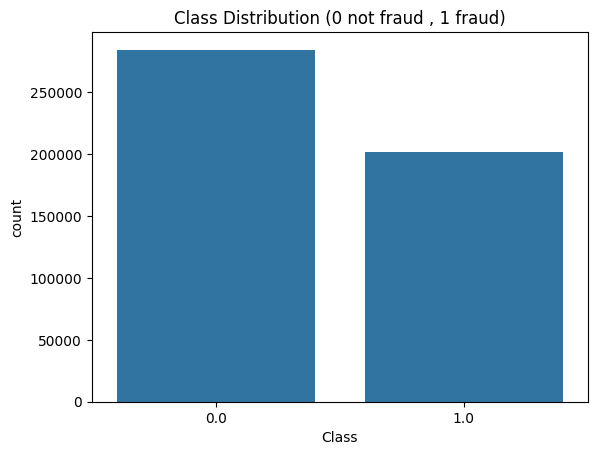

In [7]:
#visualization of class distribution
sns.countplot(x='Class',data=df)
plt.title("Class Distribution (0 not fraud , 1 fraud)")
plt.show()

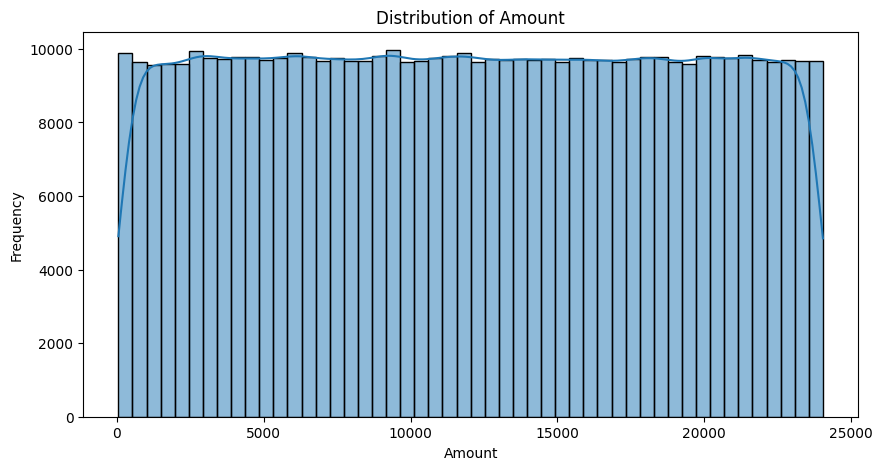

In [10]:
#analyzing amount
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'].dropna(), bins=50, kde=True)
plt.title("Distribution of Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In [11]:
#descriptive analysis for amount
print("Descriptive Analysis of Amount")
print(df['Amount'].describe())

Descriptive Analysis of Amount
count    486416.000000
mean      12038.295880
std        6921.775041
min          50.010000
25%        6048.337500
50%       12021.925000
75%       18036.225000
max       24039.930000
Name: Amount, dtype: float64


In [12]:
#proportion of the missing values
print("Proportion of missing values")
print((df.isnull().sum() / len(df))* 100)

Proportion of missing values
id        0.000000
V1        0.000000
V2        0.000000
V3        0.000000
V4        0.000000
V5        0.000000
V6        0.000000
V7        0.000000
V8        0.000000
V9        0.000000
V10       0.000000
V11       0.000000
V12       0.000000
V13       0.000000
V14       0.000206
V15       0.000206
V16       0.000206
V17       0.000206
V18       0.000206
V19       0.000206
V20       0.000206
V21       0.000206
V22       0.000206
V23       0.000206
V24       0.000206
V25       0.000206
V26       0.000206
V27       0.000206
V28       0.000206
Amount    0.000206
Class     0.000206
dtype: float64


Data Preprocessing

In [13]:
#impute numerical features with their median
for col in ['V14', 'V15', 'V16', 'V17','V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']:
  if df[col].isnull().any():
      median_val = df[col].median()
      df[col].fillna(median_val, inplace=True)
      print(f"filled missing values in {col} with median value {median_val}")


if df['Class'].isnull().any():
  print("Missing values in class col detected")
  df.dropna(subset=['Class'], inplace=True)
  print("Missing values in class col dropped")
  df['Class'] = df['Class'].astype(int)

filled missing values in V14 with median value 0.4148790992847752
filled missing values in V15 with median value -0.034052373275316294
filled missing values in V16 with median value 0.2376039229491998
filled missing values in V17 with median value 0.3128072908286482
filled missing values in V18 with median value 0.1417471831266586
filled missing values in V19 with median value -0.06632035188056995
filled missing values in V20 with median value -0.1489308181586303
filled missing values in V21 with median value -0.056407709777708454
filled missing values in V22 with median value -0.0292429916538127
filled missing values in V23 with median value -0.0549293140769159
filled missing values in V24 with median value 0.036807771450723004
filled missing values in V25 with median value -0.015557791797840899
filled missing values in V26 with median value -0.027602548151060703
filled missing values in V27 with median value -0.19132011712996475
filled missing values in V28 with median value -0.03008

In [14]:
X = df.drop('Class', axis=1)
y = df['Class']

In [15]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])
print("Amount column scaled")

Amount column scaled


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [17]:

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (340491, 30)
Shape of X_test: (145925, 30)
Shape of y_train: (340491,)
Shape of y_test: (145925,)


In [18]:
#handling imbalanced dataset using smote
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [19]:
print("\nClass distribution after SMOTE (training data):")
print(y_train_res.value_counts())


Class distribution after SMOTE (training data):
Class
0    199020
1    199020
Name: count, dtype: int64


In [20]:
#building the models
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)
print("Decision Tree is trained")

Decision Tree is trained


In [21]:
#make predictions on the original test set
y_pred_dt = dt_model.predict(X_test)


#evaluation decision tree model
print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")


Decision Tree Metrics:
Accuracy: 0.9995
Precision: 0.9994
Recall: 0.9995
F1-Score: 0.9994


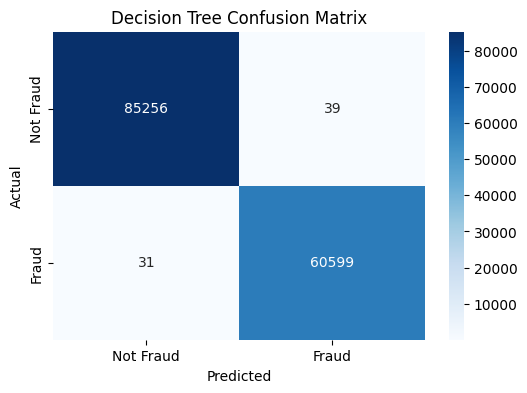

Decision Tree Confusion Matrix displayed.


In [22]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()
print("Decision Tree Confusion Matrix displayed.")

In [24]:
#Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
print("Random Forest is trained")

Random Forest is trained


In [25]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")


Random Forest Metrics:
Accuracy: 0.9998
Precision: 0.9999
Recall: 0.9996
F1-Score: 0.9998


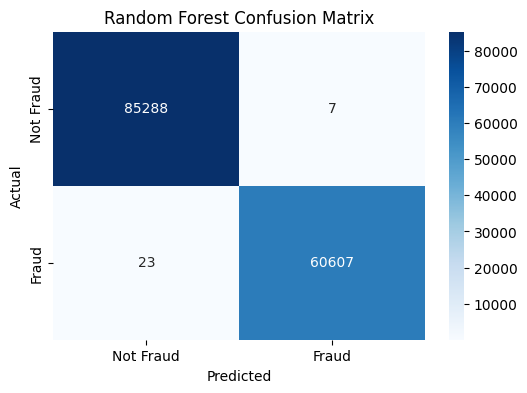

Random Forest Confusion Matrix displayed.


In [26]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()
print("Random Forest Confusion Matrix displayed.")


In [27]:
#comparing models
print("\n--- Model Comparison ---")
print("Metric    | Decision Tree | Random Forest")
print("----------|---------------|--------------")
print(f"Accuracy  | {accuracy_score(y_test, y_pred_dt):.4f}      | {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision | {precision_score(y_test, y_pred_dt):.4f}      | {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall    | {recall_score(y_test, y_pred_dt):.4f}      | {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score  | {f1_score(y_test, y_pred_dt):.4f}      | {f1_score(y_test, y_pred_rf):.4f}")


--- Model Comparison ---
Metric    | Decision Tree | Random Forest
----------|---------------|--------------
Accuracy  | 0.9995      | 0.9998
Precision | 0.9994      | 0.9999
Recall    | 0.9995      | 0.9996
F1-Score  | 0.9994      | 0.9998
